In [144]:
import pandas as pd
from distutils.version import StrictVersion
import matplotlib.pyplot as plt

from pandasql import sqldf
dfsql = lambda q: sqldf(q, globals())

pd.set_option('display.max_columns', 500)
plt.rcParams['figure.figsize'] = [15,5]

In [109]:
df_raw = pd.read_parquet('./parquet_conversion/deduped.lateral.parquet', engine='pyarrow')

In [110]:
df_raw['date'] = df_raw.gameCreation.dt.date

In [111]:
def extractShortVersion(x):
    split_array = x.split('.')
    major = split_array[0]
    minor = split_array[1]
    if len(minor) < 2:
        minor = "0{num}".format(num=minor)
    return float("{major}.{minor}".format(major=major, minor=minor))

df_raw['shortVersion'] = df_raw.gameVersion.apply(extractShortVersion)
# df['ver'] = df['shortVersion'].apply(StrictVersion)

In [112]:
df_raw['win'] = df_raw.win.apply(lambda x: 1 if x == 'Win' else 0)

In [113]:
df = df_raw[
    (df_raw['player.summonerName'] == 'Skeevo') & 
    (df_raw['shortVersion'] > 8)
]

In [114]:
df.head()

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,platformId,queueId,seasonId,participantId,player.accountId,player.currentAccountId,player.currentPlatformId,player.matchHistoryUri,player.platformId,player.profileIcon,player.summonerId,player.summonerName,championId,highestAchievedSeasonTier,spell1Id,spell2Id,stats.assists,stats.champLevel,stats.combatPlayerScore,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.damageSelfMitigated,stats.deaths,stats.doubleKills,stats.firstBloodAssist,stats.firstBloodKill,stats.firstInhibitorAssist,stats.firstInhibitorKill,stats.firstTowerAssist,stats.firstTowerKill,stats.goldEarned,stats.goldSpent,stats.inhibitorKills,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.killingSprees,stats.kills,stats.largestCriticalStrike,stats.largestKillingSpree,stats.largestMultiKill,stats.longestTimeSpentLiving,stats.magicDamageDealt,stats.magicDamageDealtToChampions,stats.magicalDamageTaken,stats.neutralMinionsKilled,stats.neutralMinionsKilledEnemyJungle,stats.neutralMinionsKilledTeamJungle,stats.objectivePlayerScore,stats.participantId,stats.pentaKills,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.physicalDamageDealt,stats.physicalDamageDealtToChampions,stats.physicalDamageTaken,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.quadraKills,stats.sightWardsBoughtInGame,stats.timeCCingOthers,stats.totalDamageDealt,stats.totalDamageDealtToChampions,stats.totalDamageTaken,stats.totalHeal,stats.totalMinionsKilled,stats.totalPlayerScore,stats.totalScoreRank,stats.totalTimeCrowdControlDealt,stats.totalUnitsHealed,stats.tripleKills,stats.trueDamageDealt,stats.trueDamageDealtToChampions,stats.trueDamageTaken,stats.turretKills,stats.unrealKills,stats.visionScore,stats.visionWardsBoughtInGame,stats.wardsKilled,stats.wardsPlaced,stats.win,teamId,timeline.creepsPerMinDeltas.0-10,timeline.csDiffPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.0-10,timeline.goldPerMinDeltas.0-10,timeline.lane,timeline.participantId,timeline.role,timeline.xpDiffPerMinDeltas.0-10,timeline.xpPerMinDeltas.0-10,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,riftHeraldKills,towerKills,vilemawKills,win,timeline.creepsPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.10-20,timeline.goldPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.10-20,timeline.xpPerMinDeltas.10-20,timeline.creepsPerMinDeltas.20-30,timeline.creepsPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.20-30,timeline.csDiffPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.20-30,timeline.damageTakenDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.20-30,timeline.damageTakenPerMinDeltas.30-end,timeline.goldPerMinDeltas.20-30,timeline.goldPerMinDeltas.30-end,timeline.xpDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.20-30,timeline.xpPerMinDeltas.30-end,countnumber,date,shortVersion
1428,2018-01-13 06:11:51.742,1910,2692754828,CLASSIC,MATCHED_GAME,8.1.213.4336,11,NA1,400,9,9,218766345,218766345,NA1,/v1/stats/player_history/NA1/218766345,NA1,3232,61079726.0,Skeevo,21,BRONZE,4,7,7,15,0,13387,8437,7018,4,1,False,True,True,False,False,True,16516,14700,0,3142,3031,3071,3006,3147,2015,3340,4,17,936,6,2,686,6600,1768,2405,12,0.0,4.0,0,9,0,8214.0,1973.0,0.0,0.0,8226.0,1501

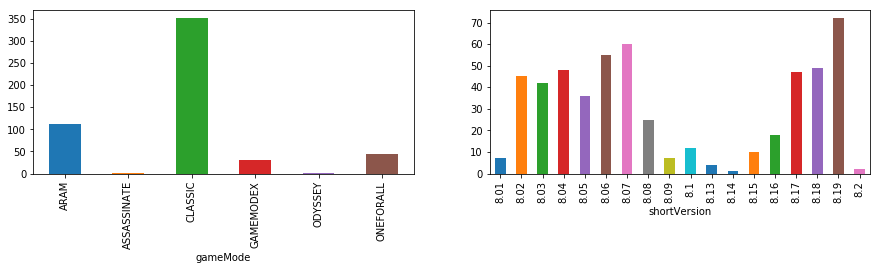

In [115]:
fig, axs = plt.subplots(1,2)
df.groupby(['gameMode'])['gameId'].nunique().plot(kind='bar', ax=axs[0])
df.sort_values(by='date').groupby(['shortVersion'])['gameId'].nunique().plot(kind='bar', ax=axs[1])

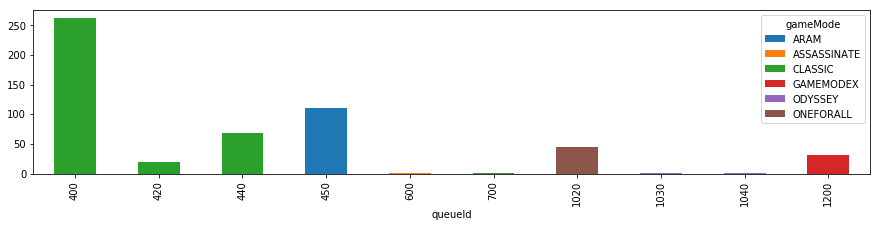

In [116]:
df.groupby(['queueId', 'gameMode'])['gameId'].nunique().unstack('gameMode').plot(kind='bar', stacked=True)

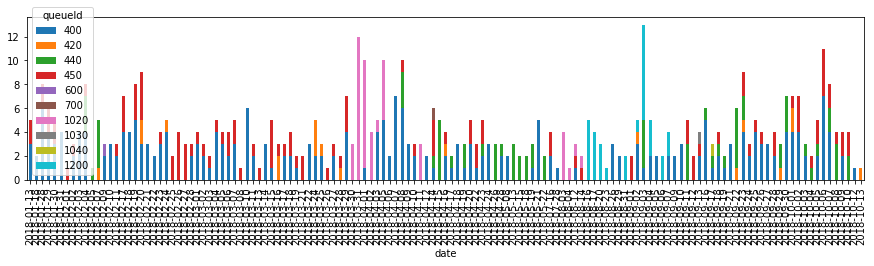

In [117]:
df.groupby(['date', 'queueId'])['gameId'].nunique().unstack('queueId').plot(kind='bar', stacked=True)

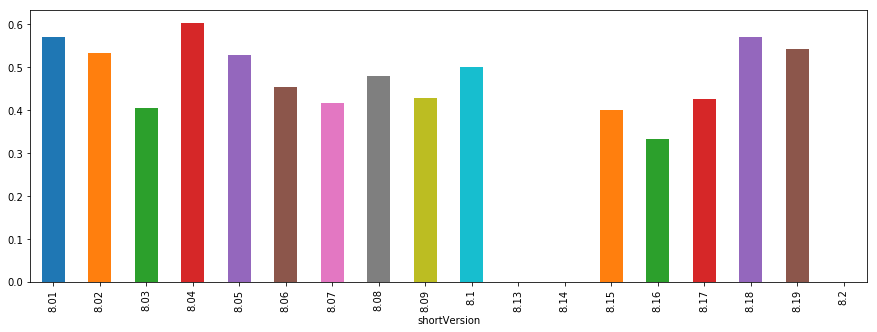

In [145]:
df.groupby(['shortVersion'])['win'].mean().plot(kind='bar')

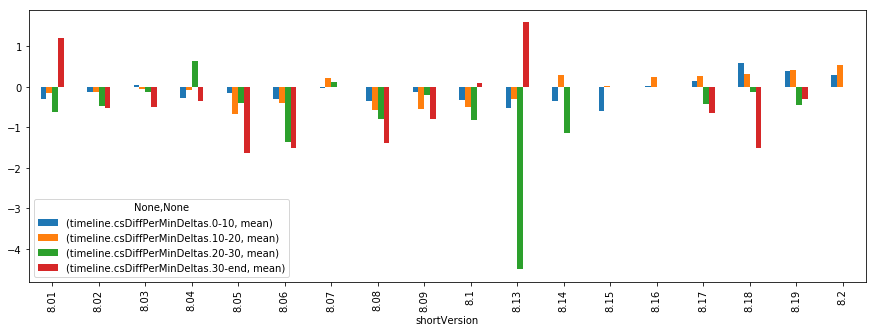

In [146]:
df.groupby(['shortVersion']).agg({
    'timeline.csDiffPerMinDeltas.0-10': ['mean'],
    'timeline.csDiffPerMinDeltas.10-20': ['mean'],
    'timeline.csDiffPerMinDeltas.20-30': ['mean'],
    'timeline.csDiffPerMinDeltas.30-end': ['mean']
}).plot(kind='bar')

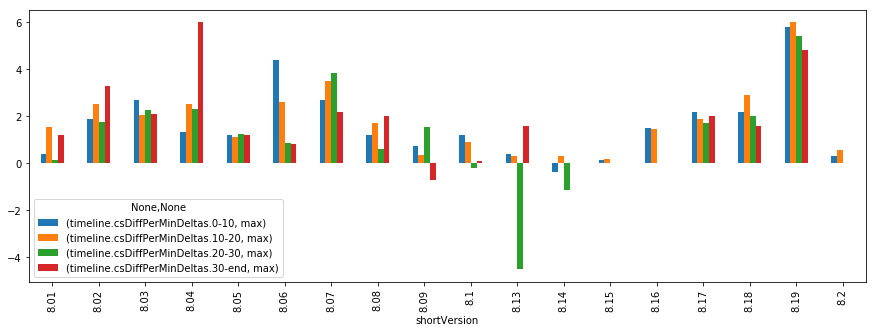

In [147]:
df.groupby(['shortVersion']).agg({
    'timeline.csDiffPerMinDeltas.0-10': ['max'],
    'timeline.csDiffPerMinDeltas.10-20': ['max'],
    'timeline.csDiffPerMinDeltas.20-30': ['max'],
    'timeline.csDiffPerMinDeltas.30-end': ['max']
}).plot(kind='bar')